In [2]:
from importlib import reload
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline
from matplotlib import pyplot as plt
import unittest
from sklearn.model_selection import train_test_split
# Custom code
# import graph; reload(graph)
# import graph_test; reload(graph_test)

/Users/kwheatley/anaconda/envs/python36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load and Transform Data

In [3]:
# import pickle
# pickle.dump(Y_data, open( "Y_data.txt", "wb" ))
# pickle.dump(X_tokens, open( "X_tokens.txt", "wb" ))

In [185]:
# Load comments from csv
combined_comments = pd.DataFrame.from_csv("Combined_Comments.csv")

In [204]:
# Get X_data and y_data. Exlude NAN comments
data = combined_comments[['comment_body','author_flair']] \
                        [(combined_comments.comment_body != '[deleted]') &
                         (~pd.isnull(combined_comments.comment_body))] \
                        .as_matrix()
X_data = data[:,0]
Y_data = data[:,1]

In [210]:
# Mask no flair slection as 'no_select'
Y_data_clean=['no_select' if x is np.nan else x for x in Y_data]
Y_dct = {k: v+1 for v, k in enumerate(set(Y_data_clean))}
Y_data_ids = [Y_dct[i] for i in Y_data_clean]

# EDA

In [81]:
# Tokenize the comments
from nltk.tokenize.treebank import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
x_tokens = [tokenizer.tokenize(str(i)) for i in X_data]

In [82]:
# Canonicalize the tokens
from common import utils, vocabulary
x_tokens_canonical = [utils.canonicalize_words(i) for i in x_tokens]

In [113]:
# Create a vocabulary dictionary from the canonicalized tokens
from gensim.corpora import Dictionary
X_dct = Dictionary(x_tokens_canonical)

In [87]:
# Longest message length
def longest(l):
    if(not isinstance(l, list)): return(0)
    return(max([len(l),] + [len(subl) for subl in l if isinstance(subl, list)] +
        [longest(subl) for subl in l]))


longest(x_tokens_canonical)

1996162

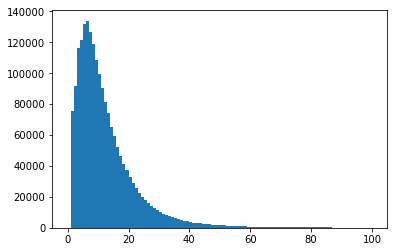

In [89]:
# Histogram for message lengths
plt.hist([len(i) for i in x_tokens_canonical], bins=100, range=[0,100])
plt.show()

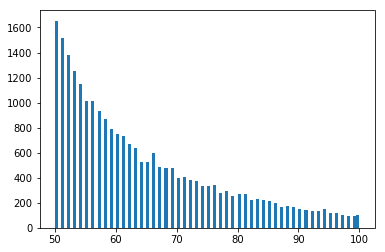

In [91]:
plt.hist([len(i) for i in x_tokens_canonical], bins=100, range=[50,100])
plt.show()

In [90]:
# Number of vocabulary words
print(len(dct))

218434


# Naive Bayes Model Baseline

In [209]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_data_csr = vectorizer.fit_transform(X_data)

In [212]:
# Split data into 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(
    X_data_csr, Y_data_ids, test_size=0.10, random_state=42)

In [213]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.02%}".format(acc))

Accuracy on test set: 15.69%


# Most-Common-Slass Baseline

In [241]:
# Most common percent
from collections import Counter
list_cnts = Counter(y_train)
highest = sorted(list_cnts, key = list_cnts.get, reverse = True)[:1]
highest_percent = list_cnts[highest[0]]/len(y_train)
highest_percent

0.08932720299688844

In [242]:
# Accuracy for test data
list_cnts = Counter(y_test)
highest = sorted(list_cnts, key = list_cnts.get, reverse = True)[:1]
highest_percent = list_cnts[highest[0]]/len(y_test)
highest_percent

0.08774891666457932